In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from pathlib import Path

filepath = Path('/content/drive/MyDrive/TechProAcademyProject/Cleaned_data.csv')

df= pd.read_pickle(filepath)
df.head()


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Clothing,1838,35,Female,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5


# Predictive Modeling, Simple Linear Regression.


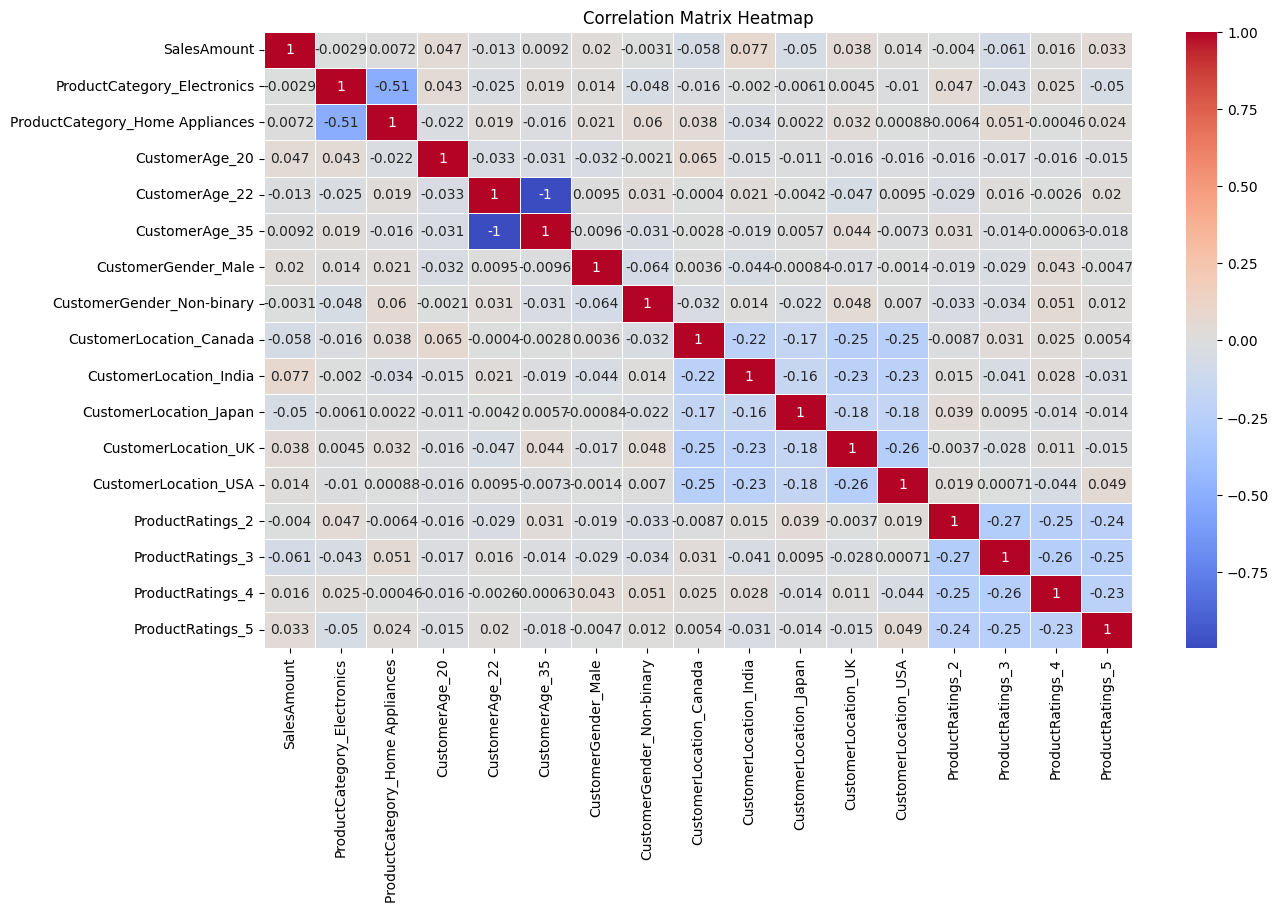

In [ ]:
# Select the colums for the predict model.
dataset = df[['ProductCategory','SalesAmount','CustomerAge','CustomerGender','CustomerLocation','ProductRatings']]

# Because some of the independent variable are strings, we get dummies
dataset = pd.get_dummies(dataset,drop_first= True)

# Display the correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



## From the above heatmap, we can see that the variables don't have corellation each other. So we expect that the linear regression models, will not give us good results.

In [ ]:
# Let's try a linear regression model between the SalesAmount and PrdouctCategory.

# Define the dependent and independent variable.
X = df['ProductCategory']
X = pd.get_dummies(X,drop_first= True)
y = df['SalesAmount']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(train_X, train_y)
print(model.score(train_X,train_y))
model.score(test_X, test_y)

0.0004112021872725302


-0.004928033634581608

In [ ]:
prediction = model.predict(test_X)

mse = mean_squared_error(test_y,prediction)
r22 = r2_score(test_y, prediction)

print(mse)


285260.7126259267
<function r2_score at 0x794d00781ea0>


numpy.float64

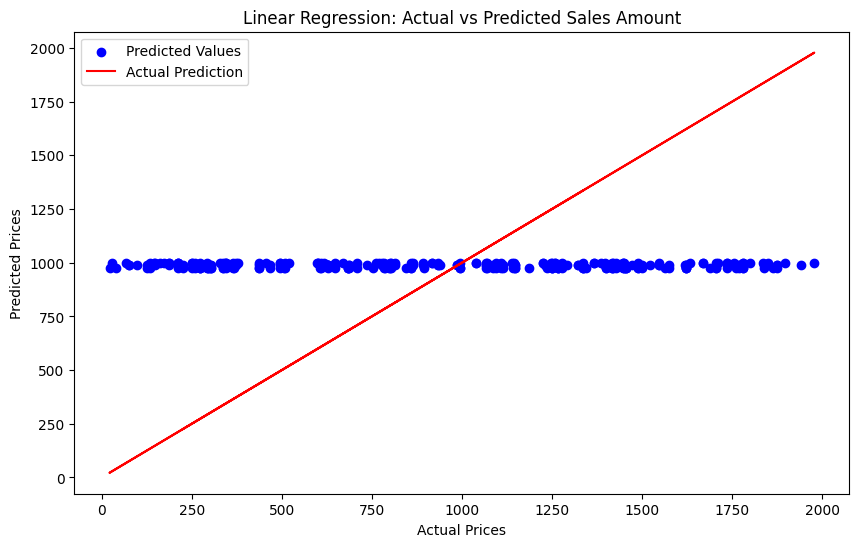

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, prediction, color='blue', label='Predicted Values')
plt.plot(test_y, test_y, color='red', label='Actual Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Sales Amount')
plt.legend()
plt.show()

### As expected the predicted model is not good and it doesn't help us predict the upcoming SalesAmount per product category.



### Let's try to apply a multi-variable regression analysis.


In [ ]:
# Define the dependent and independent variables.
X = dataset.drop('SalesAmount', axis = 1)
y = dataset['SalesAmount']


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(train_X, train_y)
print(model.score(train_X,train_y))
model.score(test_X, test_y)


0.02268262431075352


-0.010742581977774446

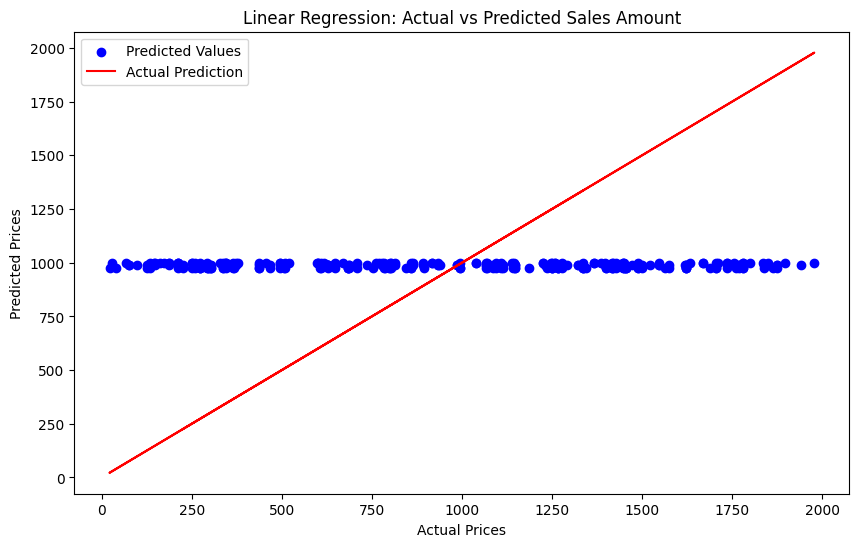

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, prediction, color='blue', label='Predicted Values')
plt.plot(test_y, test_y, color='red', label='Actual Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Sales Amount')
plt.legend()
plt.show()
